### This notebook opens fractured/not_fractured csv files and generates the TS fracture stability figure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Openo\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
fractured = pd.read_csv('fractured.csv').values.tolist()
not_fractured = pd.read_csv('not_fractured.csv').values.tolist()

In [5]:
# correct fractured salinity values
water_vol = 950
for i in range(0,len(fractured)):
    #print(fractured[i][0])
    fractured[i][0] = (fractured[i][0] * 1000 / water_vol)
    #print(fractured[i][0])
# correct not_fractured salinity values
for k in range(0,len(not_fractured)):
    #print(not_fractured[k][0])
    not_fractured[k][0] = (not_fractured[k][0] * 1000 / water_vol)
    #print(not_fractured[i][0])

In [7]:
fractured_x = []
fractured_y = []
for i in fractured:
    fractured_x.append(i[0])
    fractured_y.append(i[1])

not_fractured_x = []
not_fractured_y = []
for k in not_fractured:
    not_fractured_x.append(k[0])
    not_fractured_y.append(k[1])

In [9]:
curve_fractured_x = []
curve_fractured_y = []

tempcrack10=[]
tempcrack20=[]
tempcrack30=[]
tempcrack40=[]
tempcrack50=[]
tempcrack60=[]
tempcrack70=[]

for i in fractured:
    if i[1] == -10:
        tempcrack10.append(i[0])
    if i[1] == -20:
        tempcrack20.append(i[0])     
    if i[1] == -30:
        tempcrack30.append(i[0])
    if i[1] == -40:
        tempcrack40.append(i[0])
    if i[1] == -50:
        tempcrack50.append(i[0])
    if i[1] == -60:
        tempcrack60.append(i[0])
        
    if i[1] == -70:
        tempcrack70.append(i[0])
greatest_sal20 = max(tempcrack20)
greatest_sal30 = max(tempcrack30)
greatest_sal40 = max(tempcrack40)
greatest_sal50 = max(tempcrack50)
greatest_sal60 = max(tempcrack60)
greatest_sal70 = max(tempcrack70)
greatest_sal10 = max(tempcrack10)
curve_fractured_x.append(greatest_sal10)
curve_fractured_y.append(-10)

curve_fractured_x.append(greatest_sal20)
curve_fractured_y.append(-20)


#curve_fractured_x.append(greatest_sal30)
#curve_fractured_y.append(-30)
# Correct for errror
curve_fractured_x.append(0.2631578947368421)
curve_fractured_y.append(-30)

curve_fractured_x.append(greatest_sal40)
curve_fractured_y.append(-40)

curve_fractured_x.append(greatest_sal50)
curve_fractured_y.append(-50)

curve_fractured_x.append(greatest_sal60)
curve_fractured_y.append(-60)
curve_fractured_x.append(greatest_sal70)
curve_fractured_y.append(-70)

curve_not_fractured_x =[]
curve_not_fractured_y =[]

tempnocrack5=[]
tempnocrack10=[]
tempnocrack20=[]
tempnocrack30=[]
tempnocrack40=[]
tempnocrack60=[]
tempnocrack50=[]
tempnocrack70=[]

for k in not_fractured:
    #print(k)
    if k[1] == -5:
        tempnocrack5.append(k[0])
    if k[1] == -10:
        tempnocrack10.append(k[0])
    if k[1] == -20:
        tempnocrack20.append(k[0])
  
    if k[1] == -30:
        tempnocrack30.append(k[0])
    if k[1] == -40:
        tempnocrack40.append(k[0])
    if k[1] == -50:
        tempnocrack50.append(k[0])
    if k[1] == -60:
        tempnocrack60.append(k[0])
        
    if k[1] == -70:
        tempnocrack70.append(k[0])
        print(k)
least_sal5 = min(tempnocrack5)
least_sal20 = min(tempnocrack20)
least_sal30 = min(tempnocrack30)
least_sal40 = min(tempnocrack40)
least_sal50 = min(tempnocrack50)
least_sal60 = min(tempnocrack60)
least_sal70 = min(tempnocrack70)
least_sal10 = min(tempnocrack10)

curve_not_fractured_x.append(least_sal5)
curve_not_fractured_y.append(-5)

curve_not_fractured_x.append(least_sal10)
curve_not_fractured_y.append(-10)
                
curve_not_fractured_x.append(least_sal20)
curve_not_fractured_y.append(-20)

#curve_not_fractured_x.append(least_sal30)
#curve_not_fractured_y.append(-30)
#Correct due to the exp error:
curve_not_fractured_x.append(0.3157894736842105)
curve_not_fractured_y.append(-30)

curve_not_fractured_x.append(least_sal40)
curve_not_fractured_y.append(-40)
curve_not_fractured_x.append(least_sal50)
curve_not_fractured_y.append(-50)

curve_not_fractured_x.append(least_sal60)
curve_not_fractured_y.append(-60)


curve_not_fractured_x.append(least_sal70)
curve_not_fractured_y.append(-70)

[34.73684210526316, -70.0]
[10.526315789473685, -70.0]
[6.842105263157895, -70.0]
[6.631578947368421, -70.0]
[6.0, -70.0]
[5.894736842105263, -70.0]


In [11]:
avg_curve_x = []
for i in range(0, len(curve_fractured_x)):
    difference = (curve_not_fractured_x[i + 1] - curve_fractured_x[i])
    mid_length= difference / 2
    midpoint = mid_length + curve_fractured_x[i]
    avg_curve_x.append(midpoint)
    
nofracpolyfit= np.poly1d(np.polyfit(curve_not_fractured_x, curve_not_fractured_y,3))
fracpolyfit = np.poly1d(np.polyfit(curve_fractured_x, curve_fractured_y,3))
sal = np.linspace(0,6,1000)

In [13]:
avg_polyfit= np.poly1d(np.polyfit(avg_curve_x[2:], curve_fractured_y[2:],2))
sal = np.linspace(0,6,1000)

In [15]:
# calculate residuals
predicted_values = avg_polyfit(sal)
residuals = curve_fractured_y[2:] - avg_polyfit(avg_curve_x[2:])
# calculate root mean sqr error:
rmse = np.sqrt(np.mean(residuals**2))

(-0.2, 7.0)

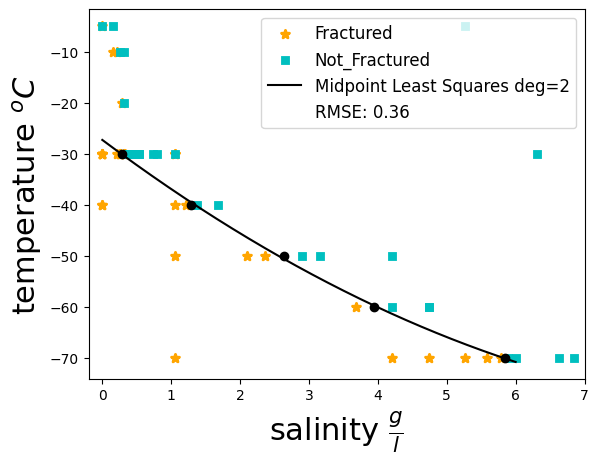

In [17]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=2,marker='*', label = 'Fractured')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.6,marker='s', label = 'Not_Fractured')
plt.scatter(avg_curve_x[2:],curve_fractured_y[2:], color = 'k')
plt.plot(sal,avg_polyfit(sal),color = 'k', label = ('Midpoint Least Squares deg=2'))
plt.xlabel(r'salinity $\frac{g}{l}$', fontsize = 22)
plt.ylabel(r'temperature ${^{o}}C$', fontsize = 22)
#plt.title('Mechanics of Briny Ice Fracture', fontsize = 22)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='none', label=f'RMSE: {rmse:.2f}'))
plt.legend(handles=handles, loc='best',fontsize = 12)

plt.xlim(-0.2,7)
#plt.savefig('mechanics_of_briny_ice_fracture_paper.png', dpi=450, bbox_inches='tight')

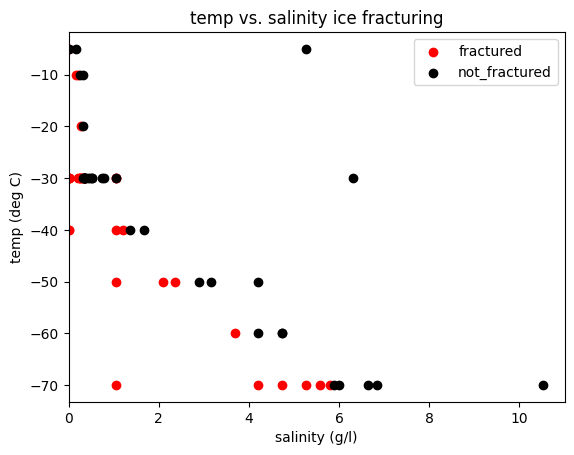

In [19]:
plt.figure(1)
plt.scatter(fractured_x, fractured_y, color = 'r', label = 'fractured')
plt.scatter(not_fractured_x,not_fractured_y, color = 'k', label = 'not_fractured')
plt.xlabel('salinity (g/l)')
plt.ylabel('temp (deg C)')
plt.title('temp vs. salinity ice fracturing')
plt.xlim(0,11)
#plt.ylim(-31,-9)
plt.legend(loc='best')

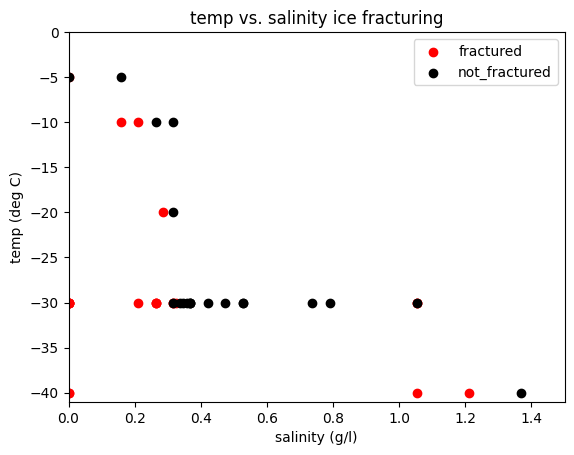

In [21]:
plt.figure(1)
plt.scatter(fractured_x, fractured_y, color = 'r', label = 'fractured')
plt.scatter(not_fractured_x,not_fractured_y, color = 'k', label = 'not_fractured')
plt.xlabel('salinity (g/l)')
plt.ylabel('temp (deg C)')
plt.title('temp vs. salinity ice fracturing')
plt.xlim(0,1.5)
plt.ylim(-41,0)
plt.legend(loc='best')

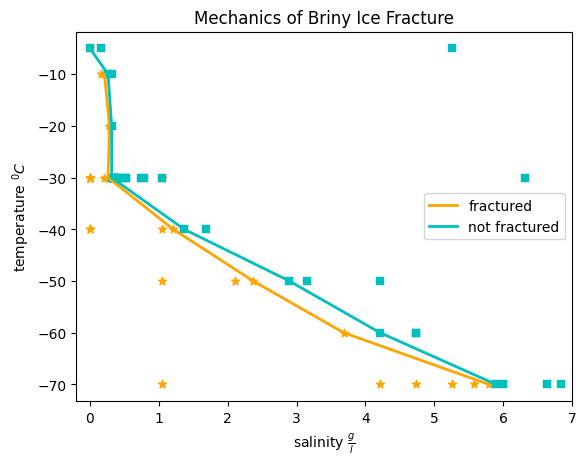

In [23]:
plt.figure(1)
plt.plot(curve_fractured_x, curve_fractured_y, color = 'orange', label = 'fractured',linewidth=2)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'c', label = 'not fractured', linewidth=2)

plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')

plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.xlim(-0.2,7)

#plt.plot(sal,polyfit(sal), color = 'k', linewidth = 2)

#plt.ylim(-30,0)
plt.legend(loc='best')

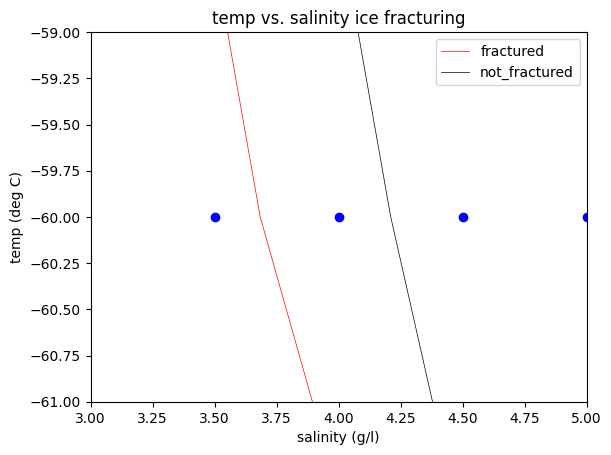

In [26]:
plt.figure(1)
plt.plot(curve_fractured_x, curve_fractured_y, color = 'r', label = 'fractured',linewidth=0.5)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'k', label = 'not_fractured', linewidth=0.5)
plt.xlabel('salinity (g/l)')
plt.ylabel('temp (deg C)')
plt.title('temp vs. salinity ice fracturing')
plt.xlim(3,5)
plt.ylim(-61,-59)
pts_of_interestx = [3.5, 4, 4.5,5]
pts_of_interesty = [-60,-60,-60,-60]
plt.scatter(pts_of_interestx, pts_of_interesty, color = 'b')
plt.legend(loc='best')

In [29]:
#middle_x = []
#for i in range(0,len(curve_not_fractured_x)):
#    middle_x.append(curve_not_fractured_x[i] - curve_fractured_x[i])
#middle_x = curve_not_fractured_x - curve_fractured_x

In [31]:
#x = [0,1,2,3,4,5,6,7,10,12,14]
#y = [0,0,1,1,4,4,5,9,25,33,55]
#fit = np.poly1d(np.polyfit(x,y,5))
#t = np.linspace(0,14,250)
#plt.plot(x,y,t,fit(t))

(-0.2, 7.0)

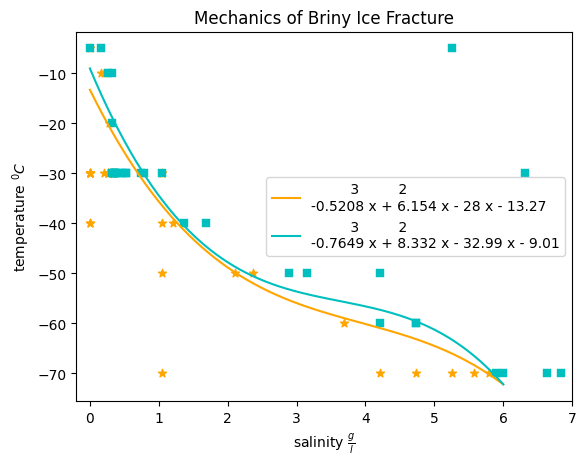

In [33]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')
plt.plot(sal,fracpolyfit(sal),color = 'orange', label = str(fracpolyfit))
plt.plot(sal,nofracpolyfit(sal),color = 'c', label = str(nofracpolyfit))
plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.legend()
plt.xlim(-0.2,7)

(-0.2, 7.0)

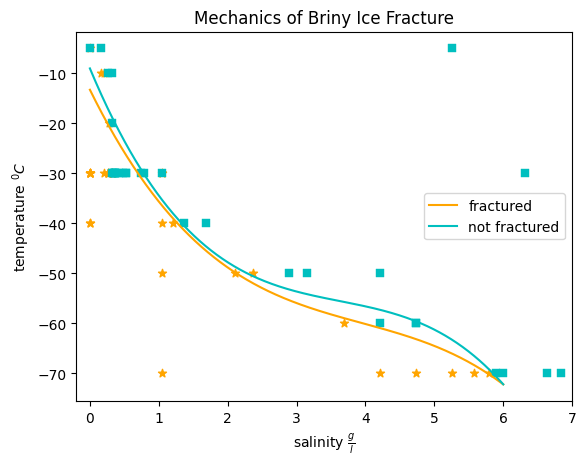

In [34]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')
plt.plot(sal,fracpolyfit(sal),color = 'orange', label = ('fractured'))
plt.plot(sal,nofracpolyfit(sal),color = 'c', label = ('not fractured'))
plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.legend()

plt.xlim(-0.2,7)

In [37]:
print(curve_fractured_x)
print(curve_not_fractured_x)

[0.21052631578947367, 0.28421052631578947, 0.2631578947368421, 1.2105263157894737, 2.3684210526315788, 3.6842105263157894, 5.7894736842105265]
[0.0, 0.2631578947368421, 0.3157894736842105, 0.3157894736842105, 1.368421052631579, 2.8947368421052633, 4.2105263157894735, 5.894736842105263]


(-0.2, 7.0)

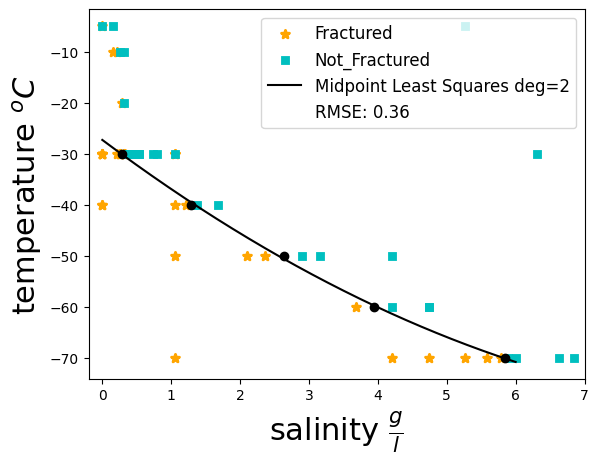

In [39]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=2,marker='*', label = 'Fractured')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.6,marker='s', label = 'Not_Fractured')
plt.scatter(avg_curve_x[2:],curve_fractured_y[2:], color = 'k')
plt.plot(sal,avg_polyfit(sal),color = 'k', label = ('Midpoint Least Squares deg=2'))
plt.xlabel(r'salinity $\frac{g}{l}$', fontsize = 22)
plt.ylabel(r'temperature ${^{o}}C$', fontsize = 22)
#plt.title('Mechanics of Briny Ice Fracture', fontsize = 22)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='none', label=f'RMSE: {rmse:.2f}'))
plt.legend(handles=handles, loc='best',fontsize = 12)

plt.xlim(-0.2,7)
#plt.savefig('mechanics_of_briny_ice_fracture_paper.png', dpi=450, bbox_inches='tight')

(-0.2, 7.0)

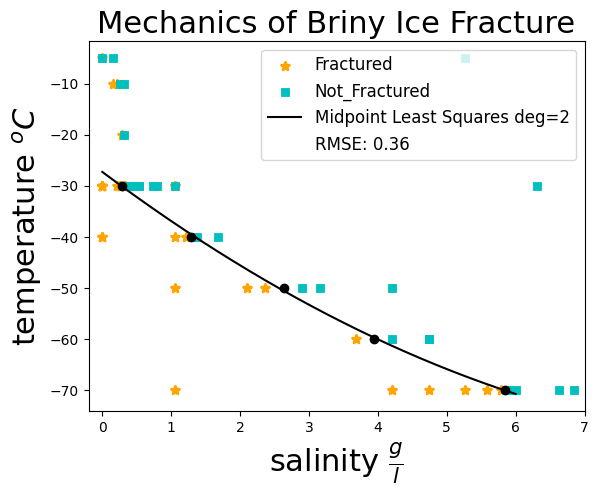

In [40]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=2,marker='*', label = 'Fractured')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.6,marker='s', label = 'Not_Fractured')
plt.scatter(avg_curve_x[2:],curve_fractured_y[2:], color = 'k')
plt.plot(sal,avg_polyfit(sal),color = 'k', label = ('Midpoint Least Squares deg=2'))
plt.xlabel(r'salinity $\frac{g}{l}$', fontsize = 22)
plt.ylabel(r'temperature ${^{o}}C$', fontsize = 22)
plt.title('Mechanics of Briny Ice Fracture', fontsize = 22)
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='none', label=f'RMSE: {rmse:.2f}'))
plt.legend(handles=handles, loc='best',fontsize = 12)

plt.xlim(-0.2,7)
#plt.savefig('mechanics_of_briny_ice_fracture.png', dpi=450, bbox_inches='tight')

Residuals: [ 0.17563175 -0.48789823  0.55310527 -0.27959372  0.03875494]


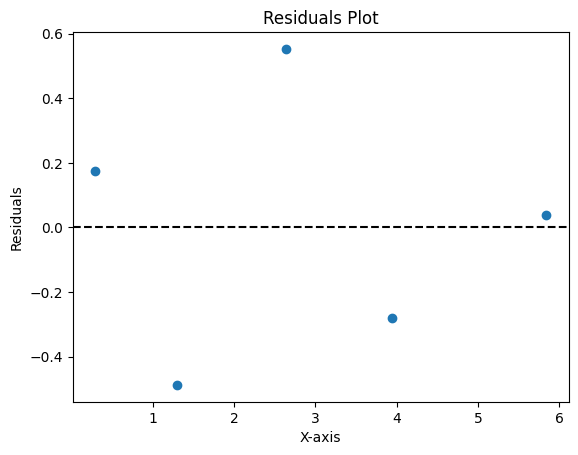

In [41]:
print("Residuals:", residuals)
plt.scatter(avg_curve_x[2:], residuals)
plt.xlabel('X-axis')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

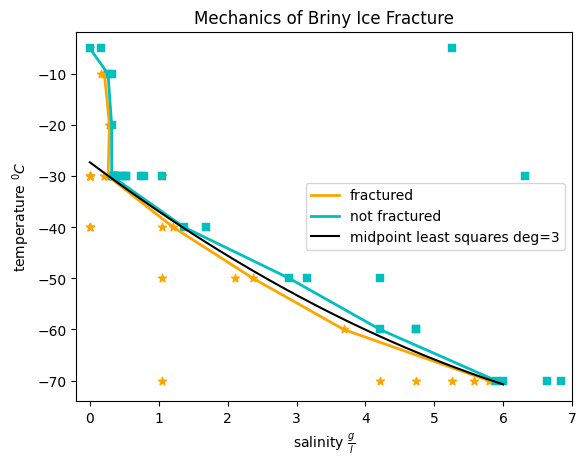

In [42]:
plt.plot(curve_fractured_x, curve_fractured_y, color = 'orange', label = 'fractured',linewidth=2)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'c', label = 'not fractured', linewidth=2)
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')
#plt.scatter(avg_curve_x,curve_fractured_y, color = 'k')
plt.plot(sal,avg_polyfit(sal),color = 'k', label = ('midpoint least squares deg=3'))
plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.xlim(-0.2,7)
plt.legend()
#plt.savefig('Mechanics of Briny Ice Fracture Poster')




In [47]:
nofracpolyfit= np.poly1d(np.polyfit(not_fractured_x, not_fractured_y,3))
fracpolyfit = np.poly1d(np.polyfit(fractured_x, fractured_y,3))
sal = np.linspace(0,6,1000)
print(fracpolyfit)

         3         2
0.01709 x + 1.092 x - 14.64 x - 25.63


(-0.2, 7.0)

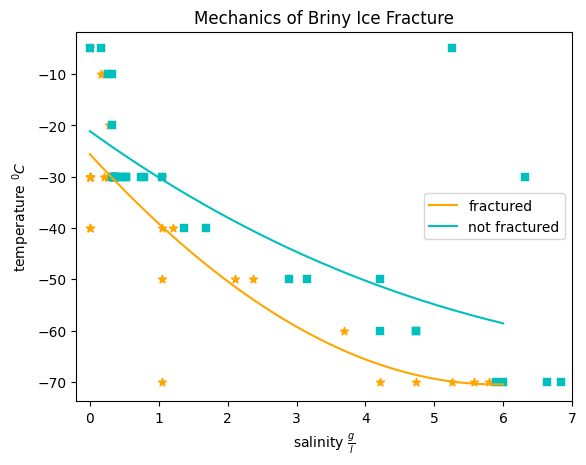

In [49]:
plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')
plt.plot(sal,fracpolyfit(sal),color = 'orange', label = ('fractured'))
plt.plot(sal,nofracpolyfit(sal),color = 'c', label = ('not fractured'))
plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.legend()

plt.xlim(-0.2,7)

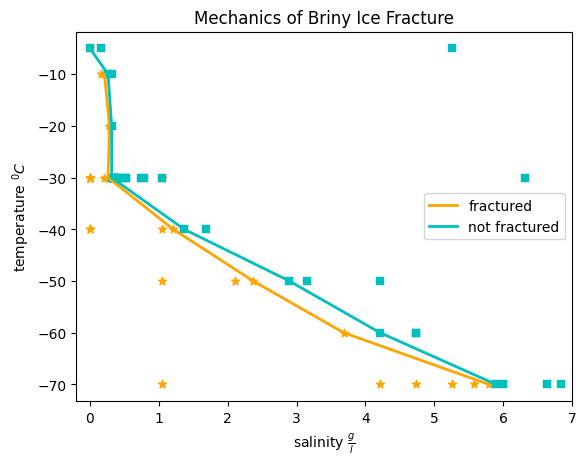

In [51]:
plt.figure(1)
plt.plot(curve_fractured_x, curve_fractured_y, color = 'orange', label = 'fractured',linewidth=2)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'c', label = 'not fractured', linewidth=2)

plt.scatter(fractured_x, fractured_y, color = 'orange', linewidth=1,marker='*')
plt.scatter(not_fractured_x,not_fractured_y, color = 'c',linewidth=0.3,marker='s')

plt.xlabel(r'salinity $\frac{g}{l}$')
plt.ylabel(r'temperature ${^{0}}C$')
plt.title('Mechanics of Briny Ice Fracture')
plt.xlim(-0.2,7)

#plt.plot(sal,polyfit(sal), color = 'k', linewidth = 2)

#plt.ylim(-30,0)
plt.legend(loc='best')



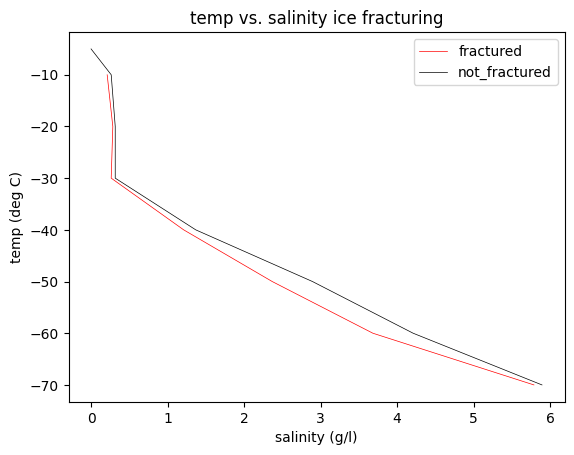

In [52]:
plt.figure(1)
plt.plot(curve_fractured_x, curve_fractured_y, color = 'r', label = 'fractured',linewidth=0.5)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'k', label = 'not_fractured', linewidth=0.5)
plt.xlabel('salinity (g/l)')
plt.ylabel('temp (deg C)')
plt.title('temp vs. salinity ice fracturing')
#plt.xlim(0.10,0.35)
#plt.ylim(-30,0)
plt.legend(loc='best')

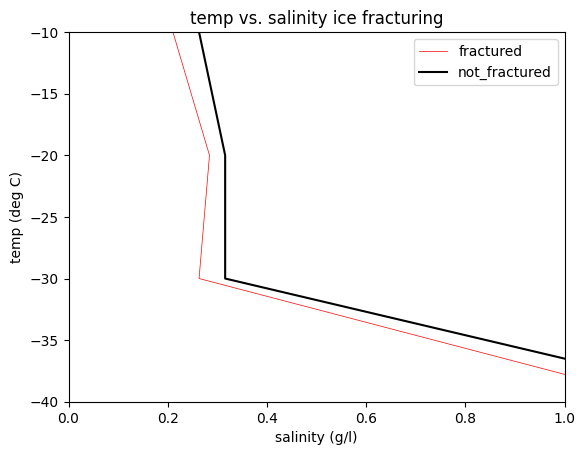

In [55]:
plt.figure(1)
plt.plot(curve_fractured_x, curve_fractured_y, color = 'r', label = 'fractured',linewidth=0.5)
plt.plot(curve_not_fractured_x,curve_not_fractured_y, color = 'k', label = 'not_fractured')
plt.xlabel('salinity (g/l)')
plt.ylabel('temp (deg C)')
plt.title('temp vs. salinity ice fracturing')
plt.xlim(0,1)
plt.ylim(-40,-10)
plt.legend(loc='best')